In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas_datareader as pdr
import datetime 
df = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,50.475544
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.876015
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,50.389194
2011-12-29,57.950001,57.215714,57.628571,57.874287,53994500,50.699566
2011-12-30,58.040001,57.641430,57.644287,57.857143,44915500,50.684540


In [5]:
df.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

# Adding a column with moving average values

In [6]:
df['20ma'] = df['Adj Close'].rolling(window=20,min_periods = 0).mean()
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods = 0).mean()


In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,20ma,100ma
Date,,,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.368505,9.368505,9.368505
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.270888,9.319696,9.319696
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.433582,9.357658,9.357658
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.364749,9.359431,9.359431
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.288410,9.345227,9.345227


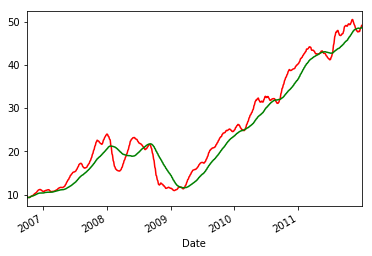

In [8]:
df['20ma'].plot(color ='r')
df['100ma'].plot(color ='g')

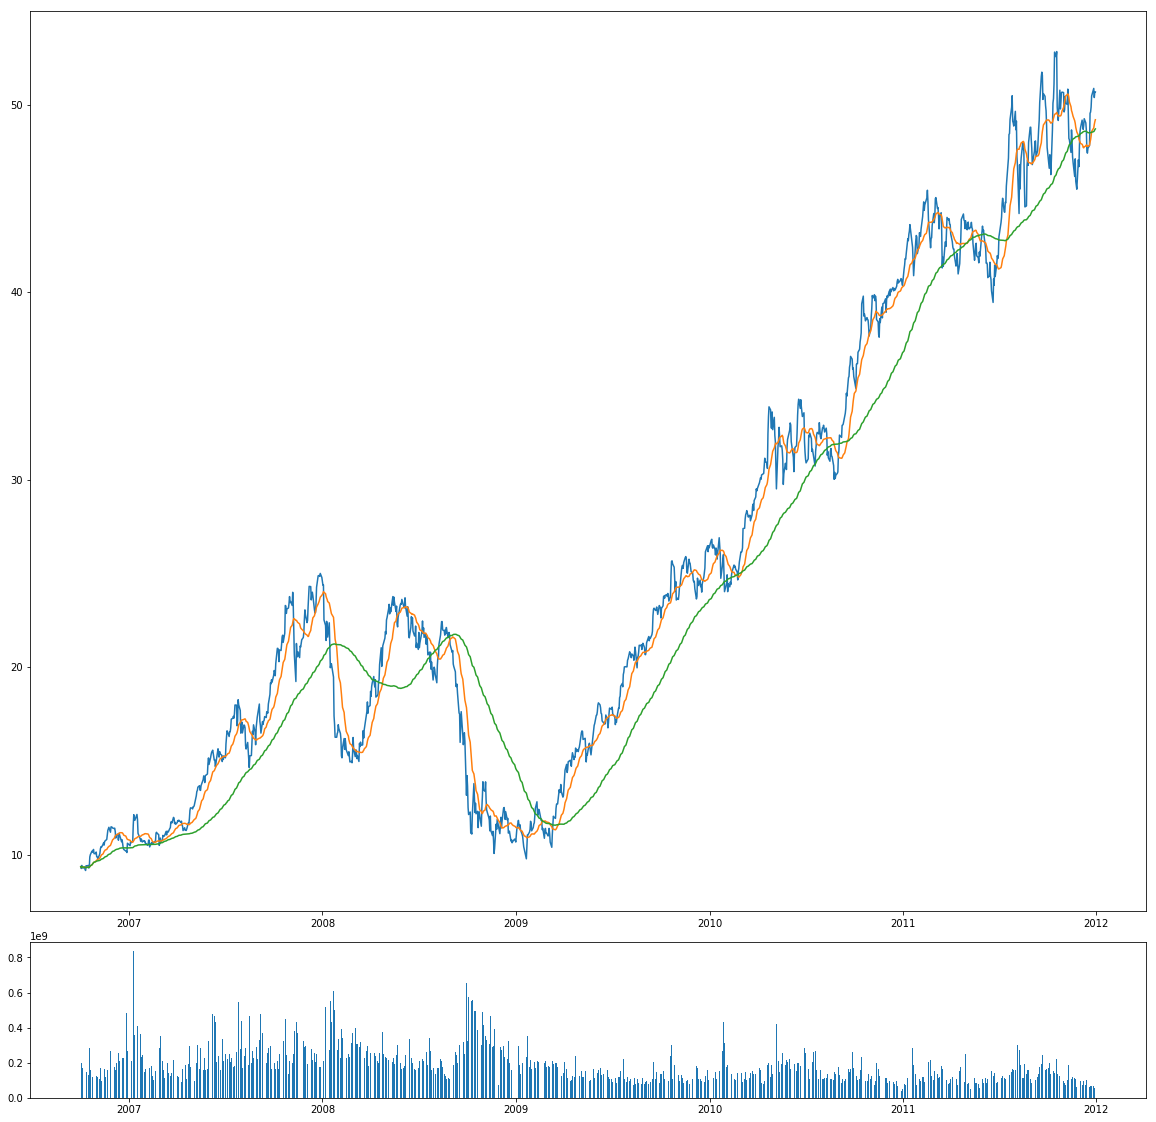

In [9]:
# plotting values of Adj Close column and 20 days moving average
plt.figure(figsize=((20,20)))
axis1=plt.subplot2grid((6,1),(0,0),rowspan = 5,colspan=1)
axis2=plt.subplot2grid((6,1),(5,0),rowspan = 1,colspan=1)
axis1.plot(df.index,df['Adj Close'])
axis1.plot(df.index,df['20ma'])
axis1.plot(df.index,df['100ma'])
axis2.bar(df.index,df['Volume'])
plt.show()

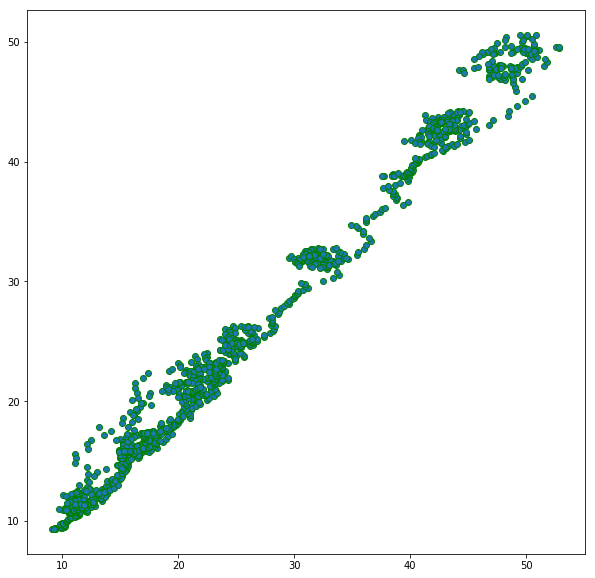

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df['Adj Close'],df['20ma'],edgecolors='g',alpha=1)

# Linear Regression Model

In [11]:
X=df[['High', 'Low', 'Open', 'Close']]
y=df[ 'Adj Close']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
predictions=lr.predict(X_test)

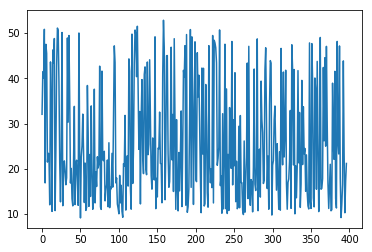

In [17]:
plt.plot(predictions)
# plt.plot(y_test,color='r')
plt.show()


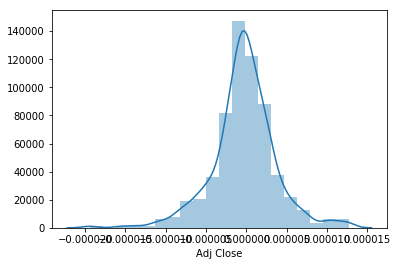

In [18]:
sns.distplot((y_test-predictions),bins=20)

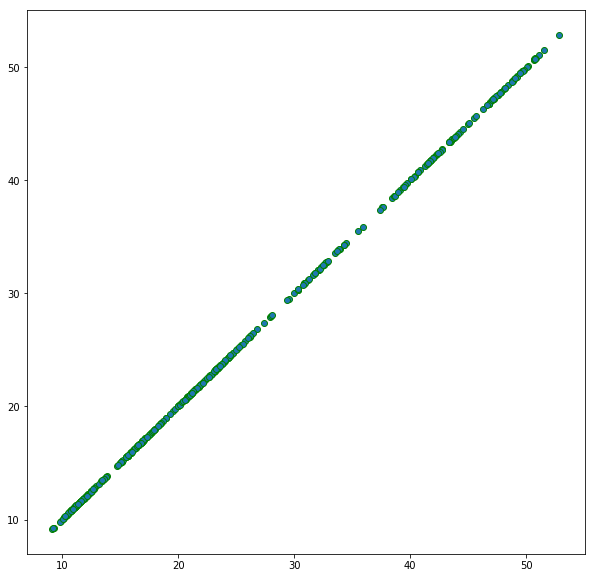

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predictions,edgecolors='g',alpha=1)

In [20]:
from sklearn import metrics

In [21]:
"MAE: ",metrics.mean_absolute_error(y_test,predictions)

('MAE: ', 2.815077171649404e-06)

In [22]:
"MSE: ",metrics.mean_squared_error(y_test,predictions)

('MSE: ', 1.6031255896924264e-11)

In [23]:
"RMSE :" , (metrics.mean_squared_error(y_test,predictions))**1/2

('RMSE :', 8.015627948462132e-12)

In [28]:
for i in range(len(df)):
    df.iloc[i]

KeyError: 0

In [36]:
mma=df.to_html(orient='split')

In [37]:
print(mma)

{"columns":["High","Low","Open","Close","Volume","Adj Close","20ma","100ma"],"index":[1159747200000,1159833600000,1159920000000,1160006400000,1160092800000,1160352000000,1160438400000,1160524800000,1160611200000,1160697600000,1160956800000,1161043200000,1161129600000,1161216000000,1161302400000,1161561600000,1161648000000,1161734400000,1161820800000,1161907200000,1162166400000,1162252800000,1162339200000,1162425600000,1162512000000,1162771200000,1162857600000,1162944000000,1163030400000,1163116800000,1163376000000,1163462400000,1163548800000,1163635200000,1163721600000,1163980800000,1164067200000,1164153600000,1164326400000,1164585600000,1164672000000,1164758400000,1164844800000,1164931200000,1165190400000,1165276800000,1165363200000,1165449600000,1165536000000,1165795200000,1165881600000,1165968000000,1166054400000,1166140800000,1166400000000,1166486400000,1166572800000,1166659200000,1166745600000,1167091200000,1167177600000,1167264000000,1167350400000,1167782400000,1167868800000,1167

In [43]:
mma=df.style

In [44]:
mma

,High,Low,Open,Close,Volume,Adj Close,20ma,100ma
Date,,,,,,,,
2006-10-02 00:00:00,10.8386,10.6143,10.7286,10.6943,178159800,9.3685,9.3685,9.3685
2006-10-03 00:00:00,10.7071,10.4557,10.6357,10.5829,197677200,9.27089,9.3197,9.3197
2006-10-04 00:00:00,10.78,10.4514,10.5857,10.7686,207270700,9.43358,9.35766,9.35766
2006-10-05 00:00:00,10.88,10.59,10.6471,10.69,170970800,9.36475,9.35943,9.35943
2006-10-06 00:00:00,10.72,10.5443,10.6314,10.6029,116739700,9.28841,9.34523,9.34523
2006-10-09 00:00:00,10.7257,10.5043,10.5429,10.6614,109555600,9.33972,9.34431,9.34431
2006-10-10 00:00:00,10.6543,10.44,10.6486,10.5443,132897100,9.2371,9.32899,9.32899
2006-10-11 00:00:00,10.5686,10.3714,10.4886,10.4614,142963800,9.16451,9.30843,9.30843
2006-10-12 00:00:00,10.77,10.5143,10.5157,10.7514,148213800,9.41857,9.32067,9.32067


In [45]:
type(mma)

pandas.io.formats.style.Styler

In [46]:
mma.head()

AttributeError: 'Styler' object has no attribute 'head'